In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def Otsu(img, rounds = 1): # img (768H, 512W)
    Masks, k_opts, min_th = ([], [], 0)
    for rd in range(rounds):
        cnt, _ = np.histogram(img.flatten(), bins = np.arange(min_th-0.5, 255.6))            
        freq, sigma_b_square = (np.zeros((256,)), np.zeros((256,)))
        freq[min_th:256] = cnt / np.sum(cnt)
        for k in range(min_th, 256): # k = min_th,min_th+1,...,255
            # Background class: [min_th,k], omega0, mu0
            # Foreground class: [k+1, 255], omega1, mu1
            omega0 = np.sum(freq[min_th:k+1])
            omega1 = np.sum(freq[k+1:256])
            mu0 = np.sum(freq[min_th:k+1] * np.arange(min_th, k+1))
            mu1 = np.sum(freq[k+1:256] * np.arange(k+1, 256))
            sigma_b_square[k] = omega0 * omega1 * (mu0-mu1) * (mu0-mu1)
        k_opt = np.argmax(sigma_b_square)
        min_th = k_opt
        Masks.append(((img > k_opt)*255).astype("uint8"))
        k_opts.append(k_opt)
        #plt.figure(); plt.subplot(211); plt.plot(freq);
        #plt.subplot(212); plt.plot(sigma_b_square); plt.xlabel("k_opt = %d" %k_opt)
    return Masks, k_opts
def Contour(img): # img (768H, 512W) binary image, 3x3 kernal
    img = img.astype("int")
    moment1 = np.zeros((img.shape[0]-2, img.shape[1]-2))
    for idx_h in range(3):
        for idx_w in range(3):
            if idx_h ==1 and idx_w == 1:
                continue
            moment1 = moment1 + img[idx_h:idx_h+img.shape[0]-2, 
                                    idx_w:idx_w+img.shape[1]-2]
    ContourImg = np.zeros(img.shape)
    ContourImg[1:-1, 1:-1] = np.logical_and(moment1 > 0, moment1 < 8)
    return ContourImg

/home/ran/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


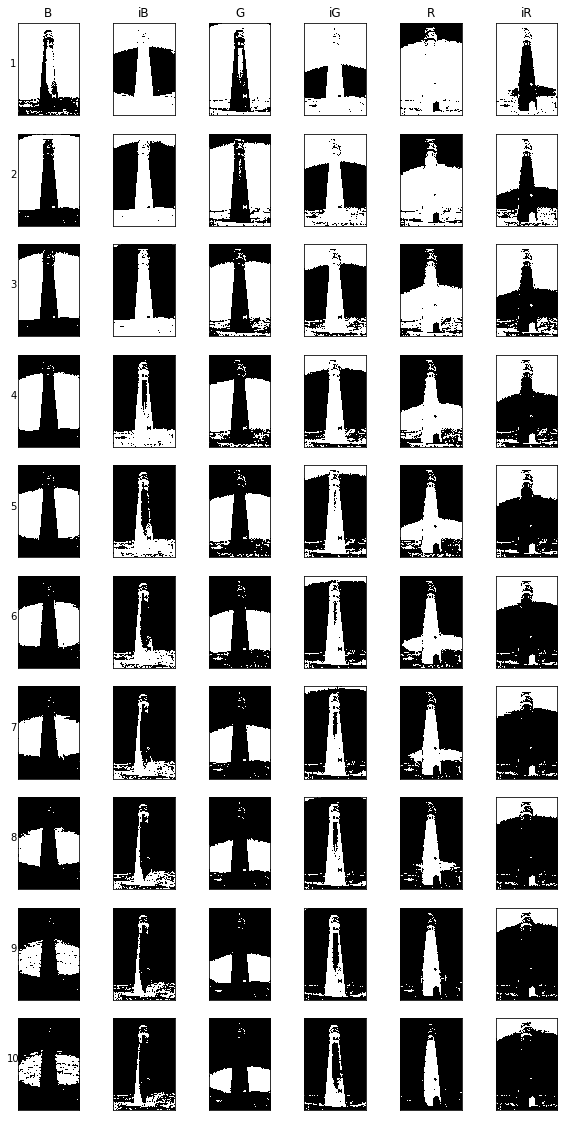

In [2]:
ImgPath = "HW6Pics/lighthouse.jpg"
img = cv2.imread(ImgPath)   # (768H, 512W, 3) uint8 np ndarray
(B, G, R) = (img[:,:,0], img[:,:,1], img[:,:,2])
(iB, iG, iR) = (255-B, 255-G, 255-R)
plt.figure(figsize=(10,20))
for c_idx, channel in enumerate([B, iB, G, iG, R, iR]):
    Masks, k_opts= Otsu(channel, rounds = 10)
    for idx, Mask in enumerate(Masks):
        plt.subplot(10,6, idx*6+c_idx+1)
        plt.imshow(Mask, cmap='gist_gray') # 0 = black, 255 = white
        plt.xticks([])
        plt.yticks([])
plt.subplot(10,6,1); plt.title("B");
plt.subplot(10,6,2); plt.title("iB");
plt.subplot(10,6,3); plt.title("G");
plt.subplot(10,6,4); plt.title("iG");
plt.subplot(10,6,5); plt.title("R");
plt.subplot(10,6,6); plt.title("iR");
for x in range(1,11):
    plt.subplot(10,6,6*x-5); plt.ylabel("%d" %x, rotation=0);
plt.savefig("lighthouse_RGBdetail.png")

True

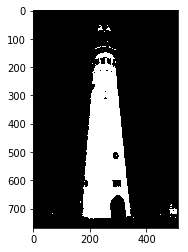

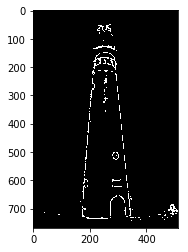

In [3]:
# Choose iB @ 3rd, iG @ 4th, R@10th round
Masks_iB, _ = Otsu(iB, rounds = 10)
Masks_iG, _ = Otsu(iG, rounds = 10)
Masks_R, _ = Otsu(R, rounds = 10)
Mask = np.logical_and(Masks_iB[2]>0, Masks_iG[3]>0)
Mask = np.logical_and(Masks_R[3]>0, Mask)

plt.figure()
plt.imshow(Mask, cmap = "gist_gray")
cv2.imwrite("lighthouse_RGB.png", (Mask*255).astype("uint8"))

ContourImg = Contour(Mask)
plt.figure()
plt.imshow(ContourImg, cmap = "gist_gray")
cv2.imwrite("lighthouse_RGBContour.png", (ContourImg*255).astype("uint8"))

/home/ran/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


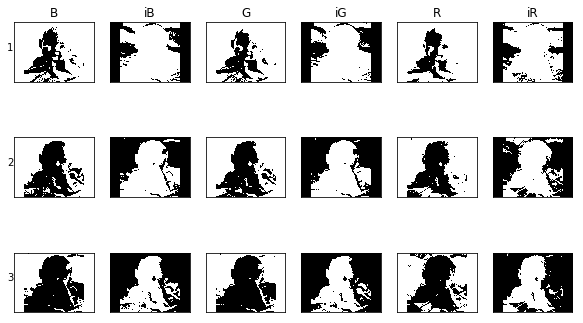

In [4]:
ImgPath = "HW6Pics/baby.jpg"
img = cv2.imread(ImgPath)   # (768H, 512W, 3) uint8 np ndarray
(B, G, R) = (img[:,:,0], img[:,:,1], img[:,:,2])
(iB, iG, iR) = (255-B, 255-G, 255-R)
plt.figure(figsize=(10,6)) # (w, h)
for c_idx, channel in enumerate([B, iB, G, iG, R, iR]):
    Masks, k_opts= Otsu(channel, rounds = 3)
    for idx, Mask in enumerate(Masks):
        plt.subplot(3,6, idx*6+c_idx+1)
        plt.imshow(Mask, cmap='gist_gray') # 0 = black, 255 = white
        plt.xticks([])
        plt.yticks([])
plt.subplot(3,6,1); plt.title("B");
plt.subplot(3,6,2); plt.title("iB");
plt.subplot(3,6,3); plt.title("G");
plt.subplot(3,6,4); plt.title("iG");
plt.subplot(3,6,5); plt.title("R");
plt.subplot(3,6,6); plt.title("iR");
for x in range(1,3+1):
    plt.subplot(3,6,6*x-5); plt.ylabel("%d" %x, rotation=0);
plt.savefig("baby_RGBdetail.png")

True

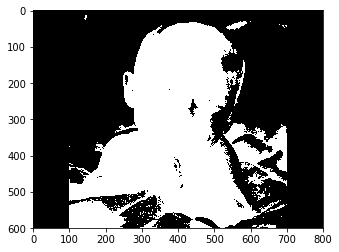

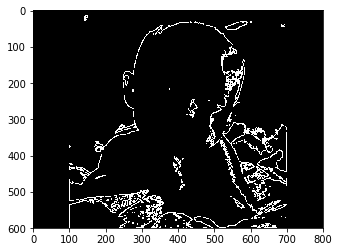

In [5]:
# Choose iB @ 2nd, iG @ 2nd, iR@ 2nd round
Masks_iB, _ = Otsu(iB, rounds = 3)
Masks_iG, _ = Otsu(iG, rounds = 3)
Masks_iR, _ = Otsu(iR, rounds = 3)
Mask = np.logical_and(Masks_iB[1]>0, Masks_iG[1]>0)
Mask = np.logical_and(Masks_iR[1]>0, Mask)
plt.figure()
plt.imshow(Mask, cmap = "gist_gray")
cv2.imwrite("baby_RGB.png", (Mask*255).astype("uint8"))

ContourImg = Contour(Mask)
plt.figure()
plt.imshow(ContourImg, cmap = "gist_gray")
cv2.imwrite("baby_RGBContour.png", (ContourImg*255).astype("uint8"))

/home/ran/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


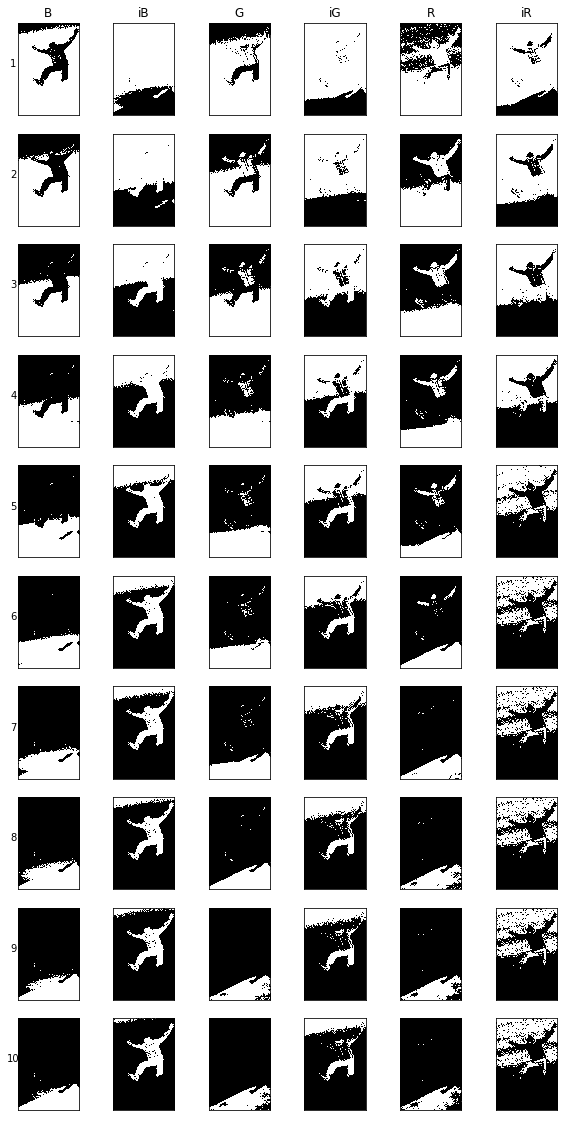

In [6]:
ImgPath = "HW6Pics/ski.jpg"
img = cv2.imread(ImgPath)   # (768H, 512W, 3) uint8 np ndarray
(B, G, R) = (img[:,:,0], img[:,:,1], img[:,:,2])
(iB, iG, iR) = (255-B, 255-G, 255-R)
plt.figure(figsize=(10,20))
for c_idx, channel in enumerate([B, iB, G, iG, R, iR]):
    Masks, k_opts= Otsu(channel, rounds = 10)
    for idx, Mask in enumerate(Masks):
        plt.subplot(10,6, idx*6+c_idx+1)
        plt.imshow(Mask, cmap='gist_gray') # 0 = black, 255 = white
        plt.xticks([])
        plt.yticks([])
plt.subplot(10,6,1); plt.title("B");
plt.subplot(10,6,2); plt.title("iB");
plt.subplot(10,6,3); plt.title("G");
plt.subplot(10,6,4); plt.title("iG");
plt.subplot(10,6,5); plt.title("R");
plt.subplot(10,6,6); plt.title("iR");
for x in range(1,11):
    plt.subplot(10,6,6*x-5); plt.ylabel("%d" %x, rotation=0);
plt.savefig("ski_RGBdetail.png")

True

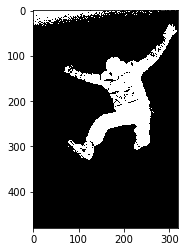

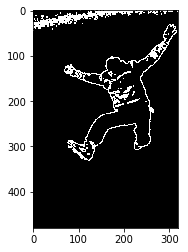

In [7]:
# Choose iB @ 10th, iG @ 1st, iR@ 1st round
Masks_iB, _ = Otsu(iB, rounds = 10)
Masks_iG, _ = Otsu(iG, rounds = 10)
Masks_iR, _ = Otsu(iR, rounds = 10)
Mask = Masks_iB[9]>0
plt.figure()
plt.imshow(Mask, cmap = "gist_gray")
cv2.imwrite("ski_RGB.png", (Mask*255).astype("uint8"))

ContourImg = Contour(Mask)
plt.figure()
plt.imshow(ContourImg, cmap = "gist_gray")
cv2.imwrite("ski_RGBContour.png", (ContourImg*255).astype("uint8"))